In [48]:
#Task A: Data Import and Exploration

#Import Necessary Packages
import pandas as pd

#Import CSV File Using Pandas and Display

df = pd.read_csv("volume_pressure_data.csv")
print(df.head())
print("")

#Use Pandas to calculate Volume and Pressure statistics
df_statistics = df[["Volume", "Pressure"]].agg(["mean", "median", "std"])
print(df_statistics)



   Volume  Pressure
0      48   29.1250
1      46   30.5625
2      44   31.9375
3      42   33.5000
4      40   35.3125

           Volume   Pressure
mean    27.120000  61.507500
median  24.000000  58.812500
std     11.192706  25.840546


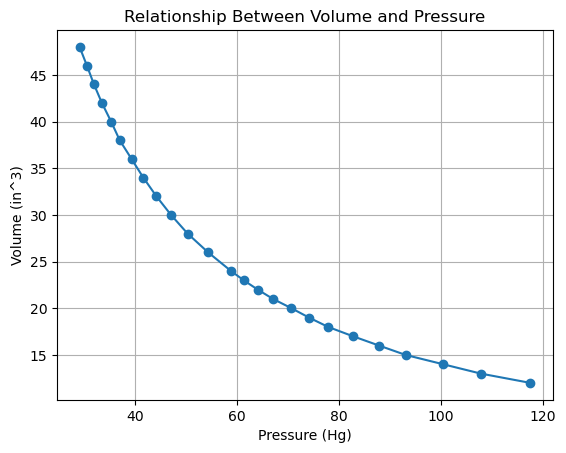

In [49]:
#Task B: Data Visualization

#Import Necessary Packages
import matplotlib.pyplot as plt

#Create plot to visualize relationship between volume and pressure
x = df["Pressure"]
y = df["Volume"]

plt.plot(x, y, marker = "o")
plt.title("Relationship Between Volume and Pressure")
plt.xlabel("Pressure (Hg)")
plt.ylabel("Volume (in^3)")
plt.grid(True)
plt.show()

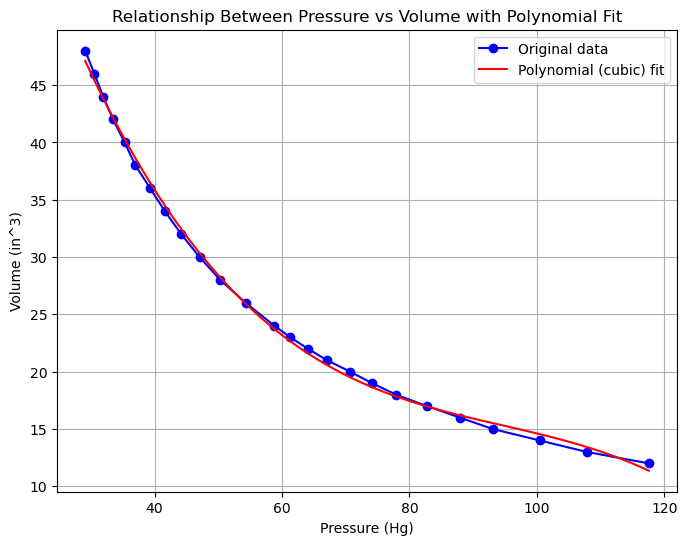

In [50]:
#Task C: Curve Fitting and Modeling

#Import NumPy
import numpy as np

#Convert dataframes to numpy
x = df["Pressure"].to_numpy()
y = df["Volume"].to_numpy()

# Fit data on a polynomial curve
coefficients = np.polyfit(x, y, deg=3)
equation = np.poly1d(coefficients)

# Generate list of x values and fit y values based on polynomial equation
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = equation(x_fit)

#Plot original data and polynomial fit
plt.figure(figsize=(8,6))
plt.plot(x, y, marker="o", color = "blue", label = "Original data")
plt.plot(x_fit, y_fit, color = "red", label="Polynomial (cubic) fit")
plt.xlabel("Pressure (Hg)")
plt.ylabel("Volume (in^3)")
plt.title("Relationship Between Pressure vs Volume with Polynomial Fit")
plt.grid(True)
plt.legend()
plt.show()


In [51]:
#Task D

#Generate coefficients from polynomial curve to create an equation
cubic_term = coefficients[0]
quadratic_term = coefficients[1]
linear_term = coefficients[2]
constant_term = coefficients[3]

#Print equation
print(f"Curve equation: y = {cubic_term:.8f}x^3 + {quadratic_term:.5f}x^2 + {linear_term:.4f}x + {constant_term:2f}, where y represents volume and x represents pressure")

Curve equation: y = -0.00008358x^3 + 0.02371x^2 + -2.3699x + 98.091880, where y represents volume and x represents pressure


### Task D

Does this relationship make physical sense?

No, it does not make physical sense for there to be a polynomial/cubic relationship between pressure and volume. We see that from Boyle's law, P X V yields a constant value, indicating that P = k/V for some constant value k in an ideal gas relationship. Therefore, P and V have an inverse relationship. A polynomial fit, therefore, would not make physical sense for our understandings. However, a polynomial fit does seem to correctly fit the data. Therefore, we must be careful of how we use Python and polynomial fits when exploring relationships between data.


In [52]:
#Task E

#Generate predictions with original x values using polynomial equation
y_hat = equation(x)

#Calculate RMSE value using NumPy
rmse_value = np.sqrt(np.mean((y - y_hat) ** 2))

#Print
print(f"RMSE value between fitted curve and actual data: {rmse_value:.6f}")


RMSE value between fitted curve and actual data: 0.431138


### Task E

Analysis of RMSE value.

RMSE values range from 0 to positive infinity, with a 0 RMSE value indicating a stronger fit for the predicted y values. Therefore, we would like to see as low of an RMSE value as possible. The RMSE value of 0.431138 is relatively close to zero, indicating that the polynomial fit does a good job of fitting the data. While it fits the data well, it does not necessarily mean that it is a good physical representation. However, for our purposes, we can report that this curve fits the data well due to its relatively low RMSE.